<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("Apple_data.csv")

In [4]:
df.head()

,Dates,price,P_B,P_S,P_FCF,P_EPS,P_EBITDA,EV_FCFF,EV_B,LTDebt_EV,EV_EBITDA,DPS,DPR
0,4/1/2010,8.428,5.4551,4.1605,17.5258,19.6642,13.4379,14.1951,4.3782,0.0,15.9334,0.0,0.0
1,4/2/2010,8.428,5.4551,4.1605,17.5258,19.6642,13.4379,14.1951,4.3782,0.0,15.9334,0.0,0.0
2,4/5/2010,8.518,5.5133,4.2050,17.7129,19.8742,13.5814,14.3834,4.4362,0.0,16.1448,0.0,0.0
3,4/6/2010,8.555,5.5376,4.2235,17.7909,19.9617,13.6412,14.4619,4.4604,0.0,16.2329,0.0,0.0
4,4/7/2010,8.593,5.5621,4.2422,17.8696,20.0500,13.7015,14.5411,4.4849,0.0,16.3218,0.0,0.0


### Change Date to datetime object

In [5]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 13 columns):
Dates        2871 non-null datetime64[ns]
price        2871 non-null float64
P_B          2871 non-null float64
P_S          2871 non-null float64
P_FCF        2871 non-null float64
P_EPS        2871 non-null float64
P_EBITDA     2871 non-null float64
EV_FCFF      2871 non-null float64
EV_B         2871 non-null float64
LTDebt_EV    2871 non-null float64
EV_EBITDA    2871 non-null float64
DPS          2871 non-null float64
DPR          2871 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 291.7 KB


---

In [7]:
df["lag_price"] = df['price'].shift(1)

In [8]:
df.head()

,Dates,price,P_B,P_S,P_FCF,P_EPS,P_EBITDA,EV_FCFF,EV_B,LTDebt_EV,EV_EBITDA,DPS,DPR,lag_price
0,2010-04-01,8.428,5.4551,4.1605,17.5258,19.6642,13.4379,14.1951,4.3782,0.0,15.9334,0.0,0.0,NaN
1,2010-04-02,8.428,5.4551,4.1605,17.5258,19.6642,13.4379,14.1951,4.3782,0.0,15.9334,0.0,0.0,8.428
2,2010-04-05,8.518,5.5133,4.2050,17.7129,19.8742,13.5814,14.3834,4.4362,0.0,16.1448,0.0,0.0,8.428
3,2010-04-06,8.555,5.5376,4.2235,17.7909,19.9617,13.6412,14.4619,4.4604,0.0,16.2329,0.0,0.0,8.518
4,2010-04-07,8.593,5.5621,4.2422,17.8696,20.0500,13.7015,14.5411,4.4849,0.0,16.3218,0.0,0.0,8.555


## Data Verification

Let's now check to see if there are any NA values in our data.

---

In [9]:
df.isnull().sum()

Dates        0
price        0
P_B          0
P_S          0
P_FCF        0
P_EPS        0
P_EBITDA     0
EV_FCFF      0
EV_B         0
LTDebt_EV    0
EV_EBITDA    0
DPS          0
DPR          0
lag_price    1
dtype: int64

---

In [10]:
df.dropna(inplace=True)

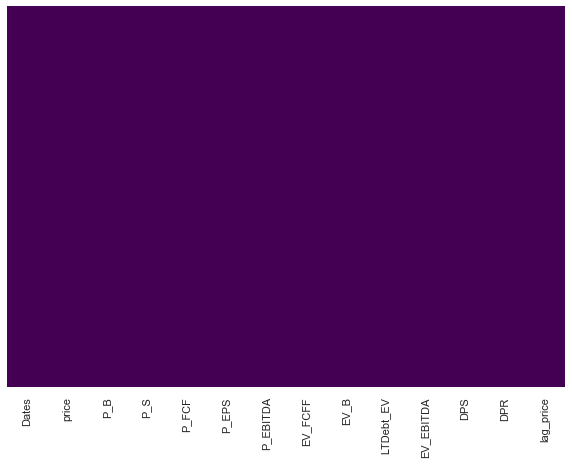

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.nunique()

Dates        2870
price        2633
P_B          2684
P_S          2605
P_FCF        2713
P_EPS        2713
P_EBITDA     2709
EV_FCFF      2729
EV_B         2697
LTDebt_EV    1925
EV_EBITDA    2725
DPS            10
DPR            35
lag_price    2632
dtype: int64

---

### Creat moving Average Data Set

In [13]:
# stma = short-term moving average
Moving_average = 62
df['MA_price'] = df['price'].rolling(window=Moving_average).mean()

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,Dates,price,P_B,P_S,P_FCF,P_EPS,P_EBITDA,EV_FCFF,EV_B,LTDebt_EV,EV_EBITDA,DPS,DPR,lag_price,MA_price
62,2010-06-28,9.582,5.6850,4.2563,16.9699,19.8447,13.8640,13.8495,4.5997,0.0,16.2047,0.0,0.0,9.525,9.100113
63,2010-06-29,9.149,5.4280,4.0639,16.2027,18.9475,13.2372,13.0786,4.3437,0.0,15.3028,0.0,0.0,9.582,9.111742
64,2010-06-30,8.983,5.3297,3.9903,15.9092,18.6043,12.9975,12.7838,4.2457,0.0,14.9577,0.0,0.0,9.149,9.119242
65,2010-07-01,8.874,5.2651,3.9419,15.7163,18.3787,12.8399,12.5899,4.1814,0.0,14.7309,0.0,0.0,8.983,9.124387
66,2010-07-02,8.819,5.2324,3.9175,15.6189,18.2648,12.7603,12.4921,4.1489,0.0,14.6164,0.0,0.0,8.874,9.128032


Now lets create our target variable that we can use to determine how accurate our variables are in determing whether or not the security is a buy or sell. Notice that we are not engineering any new variables. This is because we want to use metrics and terms that any finance professional would be familiar with.

---

In [16]:
# if last price > MA buy otherwise sell. 
#df_MA['signal']= np.where(df_MA['lag_price']>df_MA['MA_price'],1,0)
df['signal']= np.where(df['lag_price']>df['MA_price'],1,0)

In [17]:
df.head()

,Dates,price,P_B,P_S,P_FCF,P_EPS,P_EBITDA,EV_FCFF,EV_B,LTDebt_EV,EV_EBITDA,DPS,DPR,lag_price,MA_price,signal
62,2010-06-28,9.582,5.6850,4.2563,16.9699,19.8447,13.8640,13.8495,4.5997,0.0,16.2047,0.0,0.0,9.525,9.100113,1
63,2010-06-29,9.149,5.4280,4.0639,16.2027,18.9475,13.2372,13.0786,4.3437,0.0,15.3028,0.0,0.0,9.582,9.111742,1
64,2010-06-30,8.983,5.3297,3.9903,15.9092,18.6043,12.9975,12.7838,4.2457,0.0,14.9577,0.0,0.0,9.149,9.119242,1
65,2010-07-01,8.874,5.2651,3.9419,15.7163,18.3787,12.8399,12.5899,4.1814,0.0,14.7309,0.0,0.0,8.983,9.124387,0
66,2010-07-02,8.819,5.2324,3.9175,15.6189,18.2648,12.7603,12.4921,4.1489,0.0,14.6164,0.0,0.0,8.874,9.128032,0


In [18]:
df.dropna(inplace=True)

In [19]:
pd.crosstab(df['signal'], df['signal'], normalize='all')*100

signal,0,1
signal,,
0,32.53827,0.00000
1,0.00000,67.46173


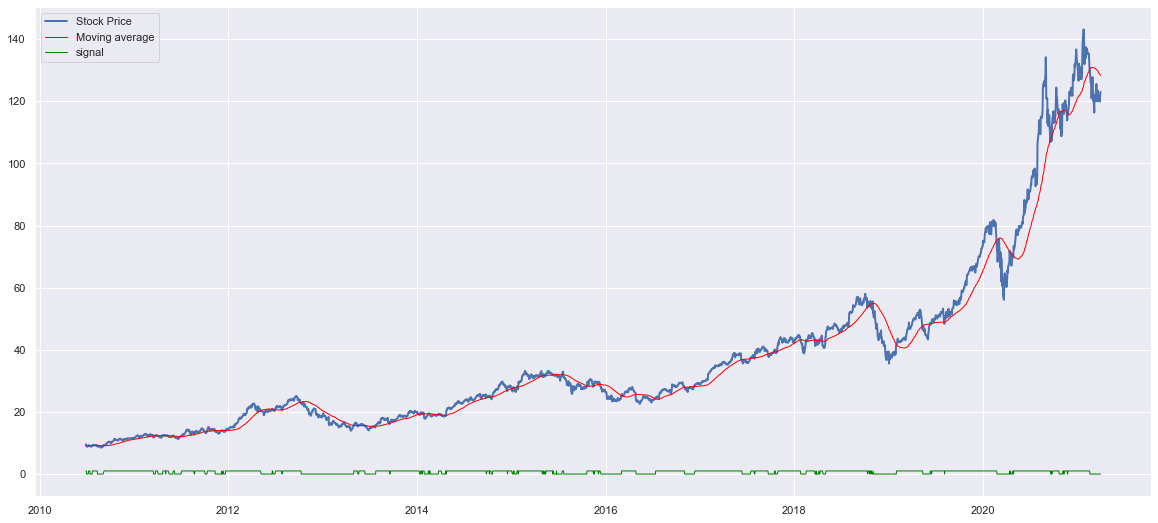

In [20]:
plt.figure(figsize=(20,9))
plt.plot( 'Dates', 'price', data=df, markerfacecolor='blue', markersize=12, linewidth=2, label='Stock Price')
plt.plot( 'Dates', 'MA_price', data=df, marker='', color='red', linewidth=1, label='Moving average')
plt.plot( 'Dates', 'signal', data=df, marker='', color='green', linewidth=1, label='signal')
plt.legend()
plt.show()

---

### Random Forest Classification

First, we need to remove some of the variables

In [21]:
df.columns

Index(['Dates', 'price', 'P_B', 'P_S', 'P_FCF', 'P_EPS', 'P_EBITDA', 'EV_FCFF',
       'EV_B', 'LTDebt_EV', 'EV_EBITDA', 'DPS', 'DPR', 'lag_price', 'MA_price',
       'signal'],
      dtype='object')

### Splitting the Data Set

In [22]:
y = df['signal']
X = df[['P_EPS', 'P_B', 'P_S', 'P_FCF','P_EBITDA', 'EV_FCFF', 'EV_B', 'LTDebt_EV', 'EV_EBITDA', 'DPS', 'lag_price']] # becareful inplace= False

split = int(0.70 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
###
X_train.head()

,P_EPS,P_B,P_S,P_FCF,P_EBITDA,EV_FCFF,EV_B,LTDebt_EV,EV_EBITDA,DPS,lag_price
62,19.8447,5.6850,4.2563,16.9699,13.8640,13.8495,4.5997,0.0,16.2047,0.0,9.525
63,18.9475,5.4280,4.0639,16.2027,13.2372,13.0786,4.3437,0.0,15.3028,0.0,9.582
64,18.6043,5.3297,3.9903,15.9092,12.9975,12.7838,4.2457,0.0,14.9577,0.0,9.149
65,18.3787,5.2651,3.9419,15.7163,12.8399,12.5899,4.1814,0.0,14.7309,0.0,8.983
66,18.2648,5.2324,3.9175,15.6189,12.7603,12.4921,4.1489,0.0,14.6164,0.0,8.874


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Fitting RF classifier to the Training set

RF_classifierst = RandomForestClassifier()
RF_classifierst.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# Predicting the Test set results
y_hat = RF_classifierst.predict(X_test)


---

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
print(confusion_matrix(y_test, y_hat))

[[ 25 194]
 [  2 622]]


In [28]:
# defining our own confusion matrix function
from sklearn.metrics import confusion_matrix
def my_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    accuracy = round((TP+TN) / (TP+ FP+ FN+ TN) ,2)
    precision = round( TP / (TP+FP),2)
    recall = round( TP / (TP+FN),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : 0 ','Actual : 1'], columns=['Predict : 0','Predict :1 '])
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall = {}'.format(recall))
    print("-----------------------------------------")
    return cm_labled

In [29]:
# Accuracy: what percentage of the total dots did we predict correctly?
# precision: among the ones that we predicted red, how many are actually red (incorporating FP: type I error)
# recall: how many of the red dots we predicted correctly (incorporating FN: type II error)
my_confusion_matrix(y_test,y_hat)




Accuracy = 0.77
Precision = 0.76
Recall = 1.0
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,25,194
Actual : 1,2,622


---

### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [31]:
# correct way of time series cross validation using rolling windows forward walk

tscv = cross_val_score(estimator = RF_classifierst, X = X_train, y = y_train, cv = TimeSeriesSplit(n_splits=10, max_train_size=Moving_average) , scoring="f1" )
tscv

array([0.7766323 , 0.73929961, 0.79389313, 0.        , 0.82508251,
       0.94047619, 0.63203463, 0.        , 0.91463415, 0.84039088])

In [32]:
round(tscv.mean(),3)

0.646

In [33]:
round(tscv.std(),3)

0.333

### GridSearch

In [34]:
param_gridst = {'max_depth': [5,10,20], 'criterion': ['entropy','gini'], 'max_features':['log2','sqrt']} 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=100, class_weight='balanced'),param_gridst,refit=True,verbose=2, cv=3)

In [37]:
# About 10 seconds
%time grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..criterion=entropy, max_depth=5, max_features=log2; total time=   0.1s
[CV] END ..criterion=entropy, max_depth=5, max_features=log2; total time=   0.1s
[CV] END ..criterion=entropy, max_depth=5, max_features=log2; total time=   0.1s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END .criterion=entropy, max_depth=10, max_features=log2; total time=   0.1s
[CV] END .criterion=entropy, max_depth=10, max_features=log2; total time=   0.2s
[CV] END .criterion=entropy, max_depth=10, max_features=log2; total time=   0.1s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.1s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.1s
[CV] END .criterion=entropy, max_depth=10, max_f

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['log2', 'sqrt']},
             verbose=2)

In [38]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}

In [39]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', random_state=100)

In [40]:
y_hat_opt = grid.predict(X_test)

In [41]:
my_confusion_matrix(y_test,y_hat_opt)



Accuracy = 0.76
Precision = 0.76
Recall = 1.0
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,17,202
Actual : 1,1,623


---

### Feature Importance

In [42]:
features = list(X_train.columns)
features

['P_EPS',
 'P_B',
 'P_S',
 'P_FCF',
 'P_EBITDA',
 'EV_FCFF',
 'EV_B',
 'LTDebt_EV',
 'EV_EBITDA',
 'DPS',
 'lag_price']

In [43]:
RF_classifier = RandomForestClassifier(n_estimators = 100, max_features='log2', max_depth=10, criterion='gini', random_state= 1000)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=1000)

In [44]:
importance = RF_classifierst.feature_importances_
importance

array([0.11789518, 0.08103371, 0.08687544, 0.12920741, 0.10181404,
       0.09621068, 0.07313078, 0.07678508, 0.06188701, 0.03194077,
       0.14321991])

In [45]:
FIM = pd.DataFrame({'Features': features , 'Feature_importance':importance})
FIM=FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
9,DPS,0.031941
8,EV_EBITDA,0.061887
6,EV_B,0.073131
7,LTDebt_EV,0.076785
1,P_B,0.081034
2,P_S,0.086875
5,EV_FCFF,0.096211
4,P_EBITDA,0.101814
0,P_EPS,0.117895
3,P_FCF,0.129207


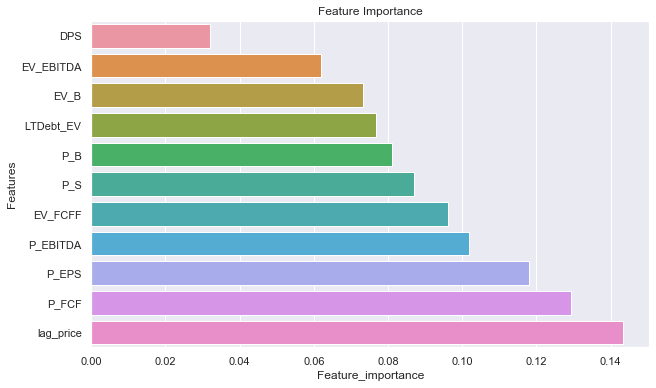

In [46]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

---

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py